In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('upa_event_ts.csv')
df = df.sort_values(by=['datetime'])

In [4]:
df.head(2)

,datetime,code,day,hour,minute,day_name,datetime.1,count,date,month
0,1535414421259,combinedproducts-search-e-flightresults-filter...,27,20,0,Monday,1535414421259,1,2018-08-27 20:00:21.259,8
1,1535414451815,transfers-checkout-e-credit-card-completed,27,20,0,Monday,1535414451815,2,2018-08-27 20:00:51.815,8


In [5]:
def get_ts(code,df):
    values = np.float32(df[df.code == code]['count'].values)
    dim = values.shape[0]
    index = np.int64(np.array([x for x in range(1,dim+1)]))
    index = index.reshape(1,dim)
    values = values.reshape(1,dim)
    return (index, values)

In [6]:
def generate_timeseries_csv():
    codes = ['cars-search','cars-checkout','cars-thanks', 'hotels-search','hotels-checkout','hotels-thanks','flights-search','flights-checkout','flights-thanks']
    for code in codes:
        x_ts, y_ts = get_ts(code, df)
        t = pd.Series(data=y_ts.flat, index=x_ts.flat)
        t.to_csv(code + ".csv")

In [12]:
x_ts, y_ts = get_ts('cars-checkout',df)

In [25]:
LEARNING_RATE = 1.0
PERIOD = 1008
PI = np.pi
ALPHA_REG = 0.5

In [26]:
x = tf.constant(x_ts,dtype=tf.float32)

y = tf.constant(y_ts,dtype=tf.float32)

multipliers = tf.constant([(x*2*PI)/PERIOD for x in range(1,PERIOD)], dtype=tf.float32)

amplitudes_cos = tf.Variable(tf.random_uniform([1, PERIOD-1], -10, 10, seed=42))

amplitudes_sin = tf.Variable(tf.random_uniform([1, PERIOD-1], -10, 10, seed=42))

bias = tf.Variable(tf.zeros([1]))

sin_part = tf.reduce_sum(tf.sin(tf.transpose(x) * multipliers) * amplitudes_sin, 1)

cos_part = tf.reduce_sum(tf.cos(tf.transpose(x) * multipliers) * amplitudes_cos, 1)

y_pred = sin_part + cos_part + bias

error = y_pred - y

regularizer = ALPHA_REG * tf.nn.l2_loss(amplitudes_cos) + ALPHA_REG * tf.nn.l2_loss(amplitudes_sin)

mse = tf.reduce_mean(tf.square(error) + regularizer, name="mse")

op = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(mse)

In [27]:
n_epochs = 1000
init = tf.global_variables_initializer()
sess = tf.Session()
with tf.Session() as sess:
        sess.run(init)
        for epoch in range(n_epochs):
            sess.run(op)
            print("epoch %s, mse = %s " % (epoch, mse.eval()))
        y_p = y_pred.eval()

epoch 0, mse = 41987.49 
epoch 1, mse = 30296.545 
epoch 2, mse = 21990.697 
epoch 3, mse = 16399.857 
epoch 4, mse = 12877.687 
epoch 5, mse = 10830.475 
epoch 6, mse = 9758.206 
epoch 7, mse = 9265.71 
epoch 8, mse = 9060.701 
epoch 9, mse = 8947.402 
epoch 10, mse = 8810.669 
epoch 11, mse = 8595.014 
epoch 12, mse = 8285.141 
epoch 13, mse = 7890.1772 
epoch 14, mse = 7432.429 
epoch 15, mse = 6939.7803 
epoch 16, mse = 6440.058 
epoch 17, mse = 5956.95 
epoch 18, mse = 5507.9136 
epoch 19, mse = 5103.9116 
epoch 20, mse = 4750.213 
epoch 21, mse = 4447.3657 
epoch 22, mse = 4192.0015 
epoch 23, mse = 3977.6672 
epoch 24, mse = 3795.9895 
epoch 25, mse = 3638.1306 
epoch 26, mse = 3496.2168 
epoch 27, mse = 3364.1238 
epoch 28, mse = 3237.5073 
epoch 29, mse = 3113.5247 
epoch 30, mse = 2990.5366 
epoch 31, mse = 2867.8552 
epoch 32, mse = 2745.5256 
epoch 33, mse = 2624.1978 
epoch 34, mse = 2505.0623 
epoch 35, mse = 2389.6538 
epoch 36, mse = 2279.5388 
epoch 37, mse = 2176.0115

epoch 349, mse = 517.157 
epoch 350, mse = 517.157 
epoch 351, mse = 517.1559 
epoch 352, mse = 517.1541 
epoch 353, mse = 517.1516 
epoch 354, mse = 517.14954 
epoch 355, mse = 517.1498 
epoch 356, mse = 517.1527 
epoch 357, mse = 517.15686 
epoch 358, mse = 517.16 
epoch 359, mse = 517.1611 
epoch 360, mse = 517.1604 
epoch 361, mse = 517.1582 
epoch 362, mse = 517.1548 
epoch 363, mse = 517.151 
epoch 364, mse = 517.14844 
epoch 365, mse = 517.1482 
epoch 366, mse = 517.14984 
epoch 367, mse = 517.1513 
epoch 368, mse = 517.1506 
epoch 369, mse = 517.1479 
epoch 370, mse = 517.1457 
epoch 371, mse = 517.1457 
epoch 372, mse = 517.1476 
epoch 373, mse = 517.1493 
epoch 374, mse = 517.1492 
epoch 375, mse = 517.14764 
epoch 376, mse = 517.14655 
epoch 377, mse = 517.1473 
epoch 378, mse = 517.1493 
epoch 379, mse = 517.1515 
epoch 380, mse = 517.1533 
epoch 381, mse = 517.1547 
epoch 382, mse = 517.15656 
epoch 383, mse = 517.15875 
epoch 384, mse = 517.1606 
epoch 385, mse = 517.1606

epoch 696, mse = 517.19025 
epoch 697, mse = 517.1928 
epoch 698, mse = 517.1869 
epoch 699, mse = 517.17706 
epoch 700, mse = 517.1735 
epoch 701, mse = 517.179 
epoch 702, mse = 517.18585 
epoch 703, mse = 517.1866 
epoch 704, mse = 517.1828 
epoch 705, mse = 517.1814 
epoch 706, mse = 517.1829 
epoch 707, mse = 517.1815 
epoch 708, mse = 517.17474 
epoch 709, mse = 517.1679 
epoch 710, mse = 517.1668 
epoch 711, mse = 517.1696 
epoch 712, mse = 517.17126 
epoch 713, mse = 517.1718 
epoch 714, mse = 517.1745 
epoch 715, mse = 517.1797 
epoch 716, mse = 517.1853 
epoch 717, mse = 517.19135 
epoch 718, mse = 517.20105 
epoch 719, mse = 517.21533 
epoch 720, mse = 517.2304 
epoch 721, mse = 517.24133 
epoch 722, mse = 517.2449 
epoch 723, mse = 517.2401 
epoch 724, mse = 517.2273 
epoch 725, mse = 517.20905 
epoch 726, mse = 517.19147 
epoch 727, mse = 517.18164 
epoch 728, mse = 517.1823 
epoch 729, mse = 517.1893 
epoch 730, mse = 517.19617 
epoch 731, mse = 517.1985 
epoch 732, mse =

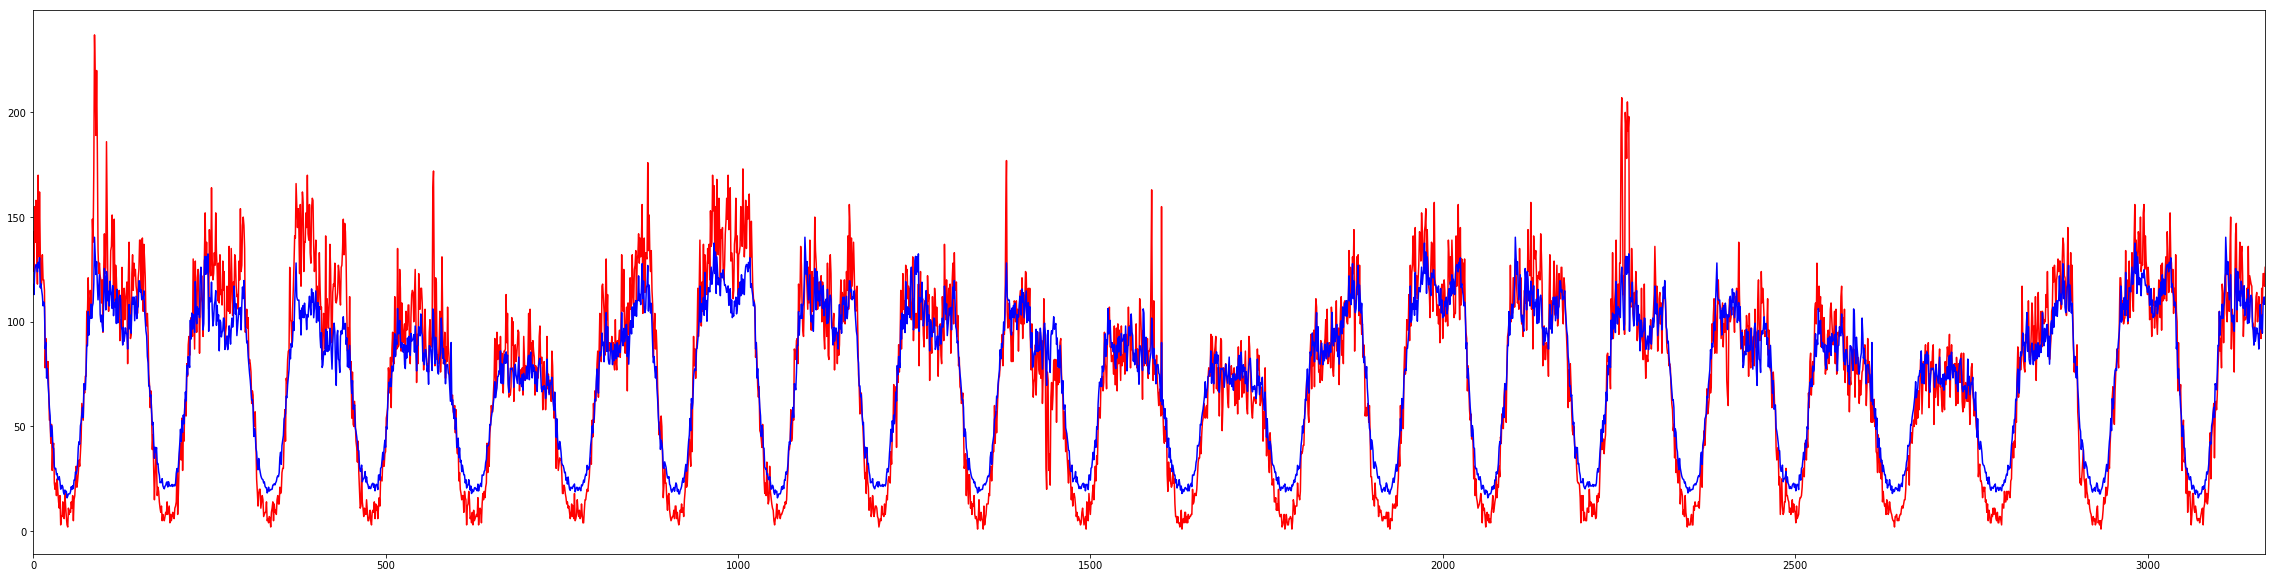

In [28]:
plt.figure(figsize=(40,10))
sbn.tsplot(y_ts, color="red")
sbn.tsplot(y_p, color="blue")

In [379]:
s = pd.Series()

In [ ]:
s.to_csv